# Artificial Intelligence mini project 1

## Task 1: 
Implement a search algorithm that can find a route between any two cities. Your program will be called find_route, and will take exactly commandline arguments as follows:

find_route input_filename origin_city destination_city heuristic_filename

An example command line is:

find_route input1.txt Bremen Kassel (For doing Uninformed search)
or
find_route input1.txt Bremen Kassel h_kassel.txt (For doing Informed search)

If heuristic is not provided then program must do uninformed search. Argument input_filename is the name of a text file such as, that describes road connections between cities in some part of the world. For example, the road system described by file input1.txt can be visualized in Figure 1 shown above. You can assume that the input file is formatted in the same way as input1.txt: each line contains three items. The last line contains the items "END OF INPUT", and that is how the program can detect that it has reached the end of the file. The other lines of the file contain, in this order, a source city, a destination city, and the length in kilometers of the road connecting directly those two cities. Each city name will be a single word (for example, we will use New_York instead of New York), consisting of upper and lowercase letters and possibly underscores.

IMPORTANT NOTE: MULTIPLE INPUT FILES WILL BE USED TO GRADE THE ASSIGNMENT, FILE IS JUST AN EXAMPLE. YOUR CODE SHOULD WORK WITH ANY INPUT FILE FORMATTED AS SPECIFIED ABOVE.

The program will compute a route between the origin city and the destination city, and will print out both the length of the route and the list of all cities that lie on that route. It should also display the number of nodes expanded and nodes generated. For example,

find_route input1.txt Bremen Kassel

should have the following output:

nodes expanded: 12
nodes generated: 20
distance: 297.0 km
route:
Bremen to Hannover, 132.0 km
Hannover to Kassel, 165.0 km

and

find_route input1.txt London Kassel

should have the following output:

nodes expanded: 7
nodes generated: 7
distance: infinity
route:
none

For full credit, you should produce outputs identical in format to the above two examples.

If a heuristic file is provided then program must perform Informed search. The heuristic file gives the estimate of what the cost could be to get to the given destination from any start state (note this is just an estimate). In this case the command line would look like

find_route input1.txt Bremen Kassel h_kassel.txt

Here the last argument contains a text file what has the heuristic values for every state wrt the given destination city (note different destinations will need different heuristic values). For example, you have been provided a sample file h_kassel.txt which gives the heuristic value for every state (assuming kassel is the goal). Your program should use this information to reduce the number of nodes it ends up expanding. Other than that, the solution returned by the program should be the same as the uninformed version. For example,

find_route input1.txt Bremen Kassel h_kassel.txt

should have the following output:

nodes expanded: 3
nodes generated: 8
distance: 297.0 km
route:
Bremen to Hannover, 132.0 km
Hannover to Kassel, 165.0 km 

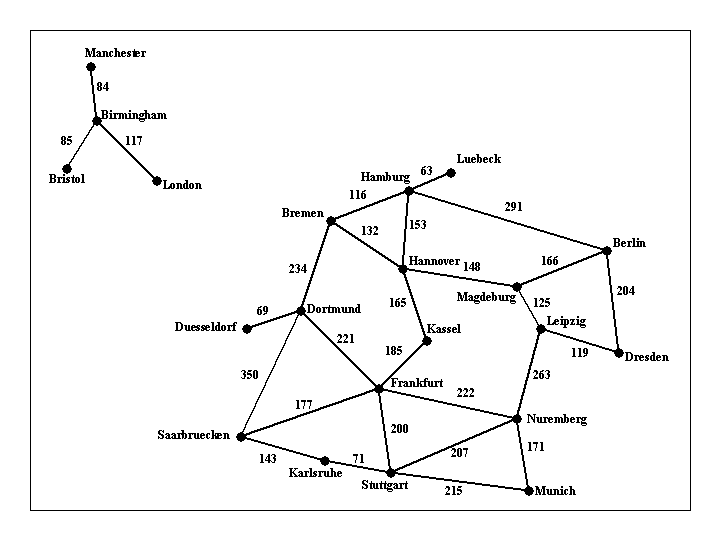

### Rough cell

In [ ]:
connections = {"Birmingham":{"London": 117, "Manchester": 84, "Bristol": 85}}
print(connections["Birmingham"]["London"])
for i in connections["Birmingham"].keys():
    print(i, connections["Birmingham"][i])

### Part 1: Read the input1.txt file
This code snippet reads the input1.txt file till the line that contains 'END OF INPUT'. It stores every line in string format in the list/ array contents where each element of the array is a string which is a line from text file. If the file is too long then it will also update on how many lines from the input file are read till now (factor of 10).

In [5]:
input1_txt = open("input1.txt",'r')
x = ''
contents = []
count = 1
prompt_after = 10

while True:
    x = input1_txt.readline().rstrip("\n")
    contents.append(x)
    if x == 'END OF INPUT':
        break 
    count += 1
    if count%prompt_after == 0:
        print(f'{count} lines read. No END OF INPUT found yet...')

input1_txt.close()

print("Completed reading input1.txt...\nContents:")
contents.remove('END OF INPUT')
print(contents)

10 lines read. No END OF INPUT found yet...
20 lines read. No END OF INPUT found yet...
Completed reading input1.txt...
Contents:
['Luebeck Hamburg 63', 'Hamburg Bremen 116', 'Hamburg Hannover 153', 'Hamburg Berlin 291', 'Bremen Hannover 132', 'Bremen Dortmund 234', 'Hannover Magdeburg 148', 'Hannover Kassel 165', 'Magdeburg Berlin 166', 'Berlin Dresden 204', 'Dresden Leipzig 119', 'Leipzig Magdeburg 125', 'Dortmund Duesseldorf 69', 'Kassel Frankfurt 185', 'Frankfurt Dortmund 221', 'Frankfurt Nuremberg 222', 'Leipzig Nuremberg 263', 'Dortmund Saarbruecken 350', 'Saarbruecken Frankfurt 177', 'Saarbruecken Karlsruhe 143', 'Karlsruhe Stuttgart 71', 'Stuttgart Frankfurt 200', 'Stuttgart Munich 215', 'Stuttgart Nuremberg 207', 'Nuremberg Munich 171', 'Manchester Birmingham 84', 'Birmingham Bristol 85', 'Birmingham London 117']


### Part 2: Reading Heuristics file.
Reading and creating a heuristics dictionary.

In [6]:
h_kassel_txt = open("h_kassel.txt",'r')
x = ''
heur = []
count = 1
prompt_after = 10

while True:
    x = h_kassel_txt.readline().rstrip("\n")
    heur.append(x)
    if x == 'END OF INPUT':
        break 
    count += 1
    if count%prompt_after == 0:
        print(f'{count} lines read. No END OF INPUT found yet...')

h_kassel_txt.close()

print("Completed reading h_kassel.txt...\nContents:")
heur.remove('END OF INPUT')
print(heur)
heuristics = {}

for i in heur:
    x = i.split(" ")
    heuristics[x[0]] = int(x[1])

print(heuristics)

10 lines read. No END OF INPUT found yet...
20 lines read. No END OF INPUT found yet...
Completed reading h_kassel.txt...
Contents:
['Luebeck 300', 'Hamburg 200', 'Hannover 100', 'Berlin 200', 'Bremen 200', 'Dortmund 100', 'Magdeburg 100', 'Kassel 0', 'Dresden 200', 'Leipzig 100', 'Duesseldorf 200', 'Frankfurt 100', 'Nuremberg 100', 'Saarbruecken 200', 'Karlsruhe 200', 'Stuttgart 200', 'Munich 200', 'Manchester 500', 'Birmingham 400', 'Bristol 400', 'London 300']
{'Luebeck': 300, 'Hamburg': 200, 'Hannover': 100, 'Berlin': 200, 'Bremen': 200, 'Dortmund': 100, 'Magdeburg': 100, 'Kassel': 0, 'Dresden': 200, 'Leipzig': 100, 'Duesseldorf': 200, 'Frankfurt': 100, 'Nuremberg': 100, 'Saarbruecken': 200, 'Karlsruhe': 200, 'Stuttgart': 200, 'Munich': 200, 'Manchester': 500, 'Birmingham': 400, 'Bristol': 400, 'London': 300}


### Part 3: Create a dictionary from the map links.
This code snippet reads the lines and converts it into some useful data structure i.e. dictionary. After executing this part, finding distance between two adjacent cities a and b will be as simple as links[a][b]. We can also find city names adjacent to city a by just writing the code, list(links[a].keys()).

In [7]:
links = {}

for i in contents:
    temp = i.split(" ")
    #print(temp)
    if temp[0] not in links.keys():
        links[temp[0]] = {temp[1]: int(temp[2])}
    else:
        links[temp[0]][temp[1]] = int(temp[2])
    
    if temp[1] not in links.keys():
        links[temp[1]] = {temp[0]: int(temp[2])}
    else:
        links[temp[1]][temp[0]] = int(temp[2])
    
print(links)

print("Ask distance between any two cities in the given map.")
a = input("Enter name of city 1: ")
b = input("Enter name of city 2: ")
try:
    print(f'The distance between {a} city and {b} city is {links[a][b]}')
    print(f'The cities adjacent to {a} are: {list(links[a].keys())}')
    print(f'The cities adjacent to {b} are: {list(links[b].keys())}')
except:
    print("Error: Path not found or the name of the cities do not exist. Note that the names are case sensitive.")

{'Luebeck': {'Hamburg': 63}, 'Hamburg': {'Luebeck': 63, 'Bremen': 116, 'Hannover': 153, 'Berlin': 291}, 'Bremen': {'Hamburg': 116, 'Hannover': 132, 'Dortmund': 234}, 'Hannover': {'Hamburg': 153, 'Bremen': 132, 'Magdeburg': 148, 'Kassel': 165}, 'Berlin': {'Hamburg': 291, 'Magdeburg': 166, 'Dresden': 204}, 'Dortmund': {'Bremen': 234, 'Duesseldorf': 69, 'Frankfurt': 221, 'Saarbruecken': 350}, 'Magdeburg': {'Hannover': 148, 'Berlin': 166, 'Leipzig': 125}, 'Kassel': {'Hannover': 165, 'Frankfurt': 185}, 'Dresden': {'Berlin': 204, 'Leipzig': 119}, 'Leipzig': {'Dresden': 119, 'Magdeburg': 125, 'Nuremberg': 263}, 'Duesseldorf': {'Dortmund': 69}, 'Frankfurt': {'Kassel': 185, 'Dortmund': 221, 'Nuremberg': 222, 'Saarbruecken': 177, 'Stuttgart': 200}, 'Nuremberg': {'Frankfurt': 222, 'Leipzig': 263, 'Stuttgart': 207, 'Munich': 171}, 'Saarbruecken': {'Dortmund': 350, 'Frankfurt': 177, 'Karlsruhe': 143}, 'Karlsruhe': {'Saarbruecken': 143, 'Stuttgart': 71}, 'Stuttgart': {'Karlsruhe': 71, 'Frankfurt': 2

### Part 4: Functions to perform Uniform Cost Search algorithm.

In [20]:
# Node struct for UCS algorithm
class node_struct:
    def __init__(self, name, pred, cost):
        self.name = name
        self.pred = pred
        self.cost = cost
        
# Function to print the contents of the fringe
def print_fringe(fringe):
    if fringe == []:
        print("\nFringe is empty.")
    else:
        print("\nFringe: ")
        for i in fringe:
            print(f'|{i.name}||{i.cost}|')

# Function to cities that are adjacent to 'city' along with their costs g(n)
def return_city_cost(links, city, closed):
    k = list(links[city.name].keys()) # get the city names adjacent to 'city' 
    return_k = []
    
    # For every adjacent city create a node with the costs and append them to a list
    # return the list of nodes of adjacent cities
    for i in range(len(k)):
        if k[i] not in closed: # check if not in closed
            return_k.append(node_struct(k[i], city, city.cost + links[city.name][k[i]])) # Node creation
    return return_k

# Function to determine node with min cost and pop the same
# Note: There are two ways to find node with minimum cost and pop
# 1. sort the fringe on basis of cost in ascending order and pop the topmost node (Covered in class) TC = O(n.log(n)) OR
# 2. find the node with min cost and pop it (used in the following function) TC = O(2n) = O(n)
def ucs_pop(fringe, closed):
    min_cost = fringe[0].cost    # initialize min_cost to one of the possible values
    return_node = fringe[0]      # initialize variable containing node to be returned or popped
    
    for i in fringe:             # find minimum cost
        if i.cost < min_cost:
            min_cost = i.cost
    print("Min cost:", min_cost) # print min cost
    for i in fringe:             # find the node in fringe with min cost
        if i.cost == min_cost:
            return_node = i
            fringe.remove(i)     # remove the node from fringe
    print("Popped node:", return_node.name) # print node to be popped
    if return_node.name not in closed:
        closed.append(return_node.name)  # add the popped node to closed
    return fringe, closed, return_node # return the node removed from fringe

# Function to perform UCS algorithm
def UCS(fringe, closed, goal, links, pm):
    nodes_expanded = 0
    nodes_generated = 0
    while True:
        # 1. Pop the node from fringe with minimum cost
        fringe, closed, node1 = ucs_pop(fringe, closed) 
        # 2. Check if the popped node is goal or not
        if node1.name == goal:
            # if it is goal then break the loop and goto block after while loop to print path found and return path cost
            print("Goal found!") 
            break
        # 3. If it is not goal then expand that node and add nodes to fringe
        city_cost = return_city_cost(links, node1, closed)  # find adjacent nodes
        nodes_expanded += 1
        for i in city_cost:
            if i.name not in closed:
                nodes_generated += 1
        #nodes_generated += len(city_cost)
        for i in city_cost:
            fringe.append(i) # add to fringe
        print_fringe(fringe) if pm == 1 else None # print fringe and closed list contents
        print("Closed:", closed) if pm == 1 else None 
        
        # if fringe is empty then return to main function and print no path exists
        if fringe == []: 
            return -1
    
    # Trace the path from the predecessors of the nodes
    path = []
    x = node1
    
    path.append(node1.name)
    print("\nPrinting the data found: ")
    while x.pred != None:
        path.append(x.pred.name)
        x = x.pred
    path = path[::-1]
    
    print("No. of nodes expanded: ", nodes_expanded)
    print("No. of nodes generated: ", nodes_generated)
    print(f'Distance: {node1.cost} km')
    # print the path found
    print("Path:")
    for i in range(len(path) - 1):
        print(f'{path[i]} to {path[i+1]}, {links[path[i]][path[i+1]]} km')
    #print("-> ".join(path))
    return node1.cost


### Part 5: Functions to perform A* algorithm

In [21]:
# Node struct for A* algorithm
class node_struct_h:
    def __init__(self, name, pred, cost, heuristics):
        self.name = name
        self.pred = pred
        #self.depth = depth
        self.cost = cost
        self.heuristics = heuristics

# Function to print the contents of the fringe
def print_fringe_h(fringe):
    if fringe == []:
        print("\nFringe is empty.")
    else:
        print("\nFringe: ")
        for i in fringe:
            print(f'|{i.name}||{i.cost}||{i.heuristics}|')

# Function to cities that are adjacent to 'city' along with their costs g(n)
def return_city_cost_h(links, city, closed, heur):
    k = list(links[city.name].keys())
    return_k = []
    for i in range(len(k)):
        if k[i] not in closed:
            # Only additional thing as compared to UCS return_city_cost function is heuristics parameter of node
            # Here heuristics is added to node structure which is f(n) = g(n) + h(n)
            return_k.append(node_struct_h(k[i], city, city.cost + links[city.name][k[i]], city.cost + links[city.name][k[i]] + heur[k[i]]))
    return return_k

# Function to determine node with min cost g(n) + heuristics h(n) and pop the same
# This function works exactly as ucs_pop function. Only difference is here we are considering heuristics parameter of node
# which is f(n) i.e. g(n) + h(n) instead of just cost i.e. g(n)
def ucs_pop_h(fringe, closed):
    min_cost = fringe[0].heuristics
    return_node = fringe[0]
    for i in fringe:
        if i.heuristics < min_cost:
            min_cost = i.heuristics
    print("Min cost:", min_cost)
    for i in fringe:
        if i.heuristics == min_cost:
            return_node = i
            fringe.remove(i)
    print("Popped node:", return_node.name)
    if return_node.name not in closed:
        closed.append(return_node.name)
    return fringe, closed, return_node

# Function to perform A* algorithm
# This function works exactly same as UCS except for one difference. Here we are considering heuristics parameter 
# of node i.e. f(n) instead of just cost i.e. g(n)
def Astar_H(fringe, closed, goal, links, heuristics_dict, pm):
    while True:
        fringe, closed, node1 = ucs_pop_h(fringe, closed)
        if node1.name == goal:
            print("Goal found")
            break
        city_cost = return_city_cost_h(links, node1, closed, heuristics_dict)
        for i in city_cost:
            fringe.append(i)
        print_fringe_h(fringe)
        print("Closed:", closed)
        if fringe == []:
            return -1
        
    path = []
    x = node1
    
    # Find the path by tracing the predecessor
    path.append(node1.name)
    print("\nPrinting the path found: ")
    while x.pred != None:
        path.append(x.pred.name)
        x = x.pred
    
    # Print the path found
    path = path[::-1]
    print("-> ".join(path))
    return node1.cost


### Part 6: Fringe and closed initialisation

In [22]:
# Function to initialize the problem statement
# create an empty closed list and fringe with single start node
def prob_init(start, goal, iu, heuristics):
    print_mode = -1
    while print_mode != 0 and print_mode != 1:
        try:
            print_mode = int(input("Enter 1 if you want to enter print mode or else 0: "))
        except:
            print("Please enter either either 1 or 0.")
    
    if iu == 0: # select node type on basis of informed or uninformed
        start_node = node_struct(start, None, 0) # Uninformed
    else:
        start_node = node_struct_h(start, None, 0, heuristics[start]) # Informed
    
    fringe = [start_node]        # Fringe with start node
    closed = []                  # empty closed nodes list
    
    if iu == 0:   # For uninformed search, call uninformed UCS search algorithm function 
        print_fringe(fringe) if print_mode == 1 else None  # Print fringe contents i.e. city names and cost
        print("Closed:", closed) if print_mode == 1 else None # Print closed nodes
        path = UCS(fringe, closed, goal, links, print_mode) #Function call

    else:         # For informed search, call informed search A* algorithm function (ignore the name of function)
        print_fringe_h(fringe) if print_mode == 1 else None # Print fringe contents i.e. city names, cost, cost + h(n)
        print("Closed:", closed) if print_mode == 1 else None # Print closed nodes
        path = Astar_H(fringe, closed, goal, links, heuristics, print_mode) # Function call
        
    if path != -1:
        print(f'The total path cost is {path} km.') # Print path cost of the path found
    else:
        print(f'\nNo path exists between {start} and {goal}.') # Print message if no path found



### Part 7: Main user input of start and goal cities
Get the start and goal city names and find path using UCS algorithm.

In [24]:
# Get the names of the start and goal city for finding path between them
print("Enter the city names between which you need to find path.")
start = input('Start: ')
goal = input('Goal: ')

# Get input if user wants to perform informed (inp = 1) or uninformed search (inp = 0)
in_or_unin = -1
while in_or_unin != 0 and in_or_unin != 1:
    try:
        in_or_unin = int(input("Enter 1 informed search or else 0: "))
    except:
        print("Please enter 0 (for uninformed) or 1 (for informed).")

# Call initialization function which inturn calls all the other algorithm functions
prob_init(start, goal, in_or_unin, heuristics)

Enter the city names between which you need to find path.
Start: Bremen
Goal: Kassel
Enter 1 informed search or else 0: 1
Enter 1 if you want to enter print mode or else 0: 1

Fringe: 
|Bremen||0||200|
Closed: []
Min cost: 200
Popped node: Bremen

Fringe: 
|Hamburg||116||316|
|Hannover||132||232|
|Dortmund||234||334|
Closed: ['Bremen']
Min cost: 232
Popped node: Hannover

Fringe: 
|Hamburg||116||316|
|Dortmund||234||334|
|Hamburg||285||485|
|Magdeburg||280||380|
|Kassel||297||297|
Closed: ['Bremen', 'Hannover']
Min cost: 297
Popped node: Kassel
Goal found

Printing the path found: 
Bremen-> Hannover-> Kassel
The total path cost is 297 km.
